In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

/s/ls4/users/grartem/RL_robots/RL_robotSim/results/FollowerContinuous/obst/allDefault/cql/CQL_continuous-grid_b5685_00000_0_2022-03-15_21-35-37
Empty data. No columns to parse from file

/s/ls4/users/grartem/RL_robots/RL_robotSim/results/FollowerContinuous/obst/allDefault/mbmpo/MBMPO_continuous-grid_bf1ab_00000_0_2022-03-16_03-26-39
Empty data. No columns to parse from file

/s/ls4/users/grartem/RL_robots/RL_robotSim/results/FollowerContinuous/obst/allDefault/maml/MAML_continuous-grid_c5eb9_00000_0_2022-03-16_01-25-09
Empty data. No columns to parse from file



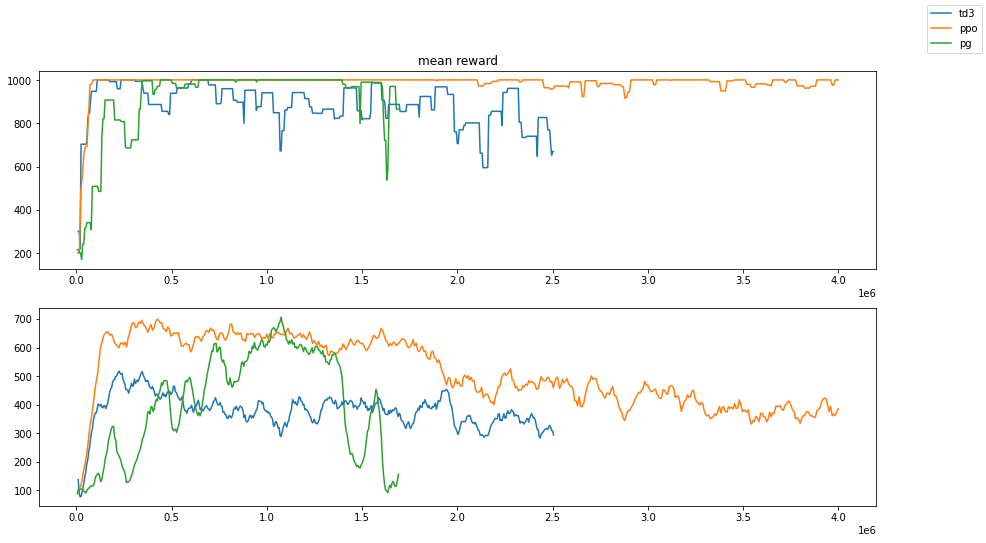

In [3]:
base_dir = "/s/ls4/users/grartem/RL_robots/RL_robotSim/results/FollowerContinuous/obst/allDefault/"
fig, axes  = plt.subplots(2,1)
for root, dirs, files in os.walk(base_dir):
    if "progress.csv" not in files:
        continue
    algoName = root.split("/")[-2]
    if algoName in ["appo", "bc", "a2c", "marwil", "impala", "sac", "a3c", "ars", "ddpg", "es"]:
    #if algoName in ["appo", "bc", "a2c", "marwil", "impala", "sac", "ddpg", "a3c"]:
        continue
    try:
        df = pd.read_csv(root+"/progress.csv")
        if len(df) ==1:
            print(algoName, "1 iteration only")
        if "episode_reward_max" in df.columns:
            axes[0].plot(df["timesteps_total"], df["episode_reward_max"], label=algoName)
        else:
            print("No max column for {}, using cummax".format(algoName))
            axes[0].plot(df["timesteps_total"], df["episode_reward_mean"].cummax(), label=algoName)
        axes[1].plot(df["timesteps_total"], df["episode_reward_mean"])
    except pd.errors.EmptyDataError as ede:
        print(root)
        print("Empty data. " + str(ede))
        print()
axes[0].set_title("max reward")
axes[0].set_title("mean reward")
fig.set_size_inches(15,8)
fig.legend()
plt.show()

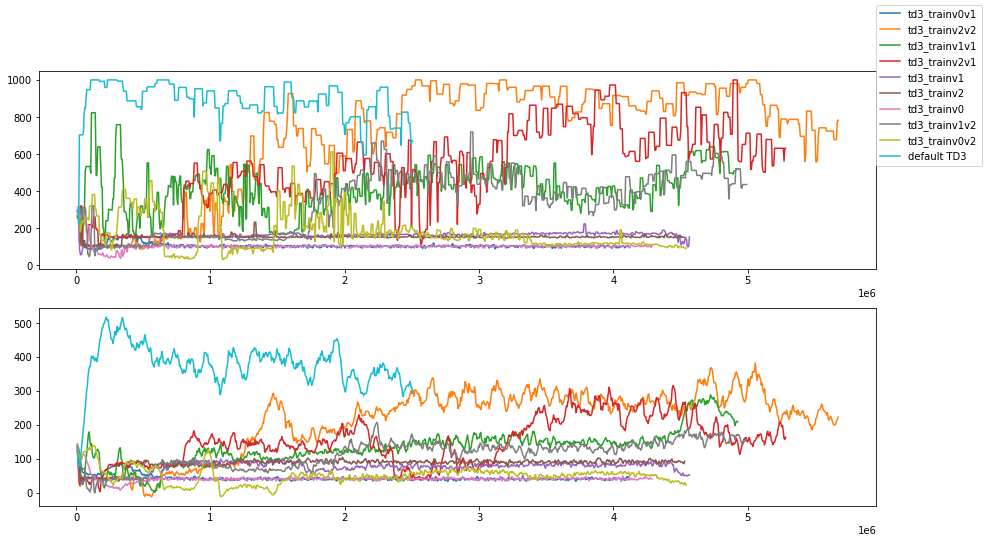

In [5]:
base_dir = "/s/ls4/users/grartem/RL_robots/RL_robotSim/results/FollowerContinuous/obst/TD3/train/"
fig, axes  = plt.subplots(2,1)
for root, dirs, files in os.walk(base_dir):
    if "progress.csv" not in files:
        continue
    expName = root.split("/")[-2]
    if expName in [#"td3_trainv0", "td3_trainv0v1", "td3_trainv0v2",
                    #"td3_trainv1", "td3_trainv1v1", "td3_trainv1v2",
                    #"td3_trainv2", "td3_trainv2v1", "td3_trainv2v2",
                    "td3_trainv0v3", "td3_trainv1v3", "td3_trainv2v3",
                    "td3_trainv4v0v0", "td3_trainv4v1v0","td3_trainv4v2v0", "td3_trainv4v3v0",
                    "td3_trainv4v0v1", "td3_trainv4v0v2", "td3_trainv4v0v3"
                    ]:
        continue
    try:
        df = pd.read_csv(root+"/progress.csv")
        axes[0].plot(df["timesteps_total"], df["episode_reward_max"], label=expName)
        axes[1].plot(df["timesteps_total"], df["episode_reward_mean"])
        #axes[2].plot(df["timesteps_total"], df["episode_reward_min"])
    except pd.errors.EmptyDataError as ede:
        print(root)
        print("Empty data. " + str(ede))
        print()
    except KeyError as ke:
        print(root)
        print("no key " + str(ke))
        print()

df = pd.read_csv("/s/ls4/users/grartem/RL_robots/RL_robotSim/results/FollowerContinuous/obst/allDefault/td3/TD3_continuous-grid_fac69_00000_0_2022-03-15_22-27-40/progress.csv")
axes[0].plot(df["timesteps_total"], df["episode_reward_max"], label="default TD3")
axes[1].plot(df["timesteps_total"], df["episode_reward_mean"])
fig.set_size_inches(15,8)
fig.legend()
plt.show()

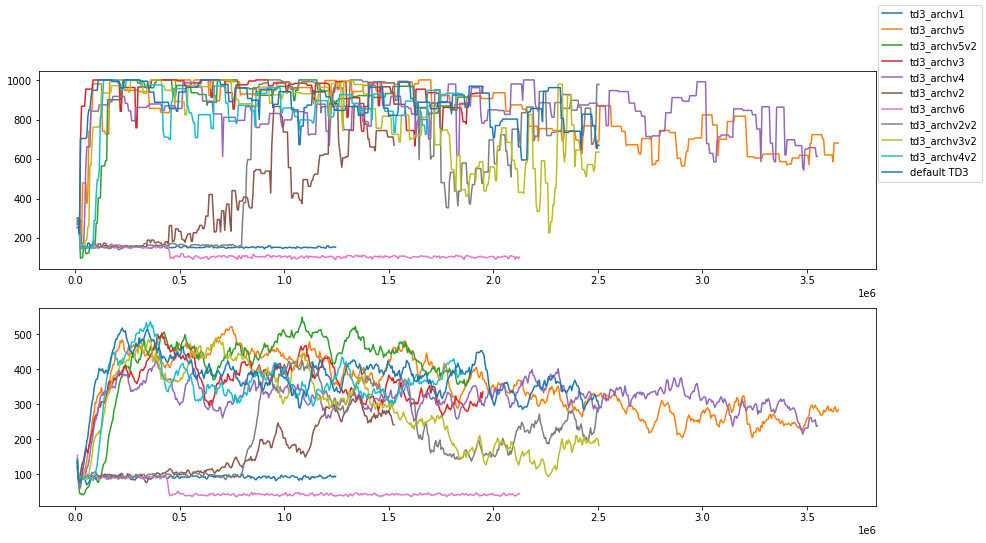

In [6]:
base_dir = "/s/ls4/users/grartem/RL_robots/RL_robotSim/results/FollowerContinuous/obst/TD3/arch/"
fig, axes  = plt.subplots(2,1)
for root, dirs, files in os.walk(base_dir):
    if "progress.csv" not in files:
        continue
    expName = root.split("/")[-2]
    #if expName in ["td3_archv6", "td3_archv1", "td3_archv2", "td3_archv2v2"]:
    #    continue
    try:
        df = pd.read_csv(root+"/progress.csv")
        axes[0].plot(df["timesteps_total"], df["episode_reward_max"], label=expName)
        axes[1].plot(df["timesteps_total"], df["episode_reward_mean"])
        #axes[2].plot(df["timesteps_total"], df["episode_reward_min"])
    except pd.errors.EmptyDataError as ede:
        print(root)
        print("Empty data. " + str(ede))
        print()
    except KeyError as ke:
        print(root)
        print("no key " + str(ke))
        print()
df = pd.read_csv("/s/ls4/users/grartem/RL_robots/RL_robotSim/results/FollowerContinuous/obst/allDefault/td3/TD3_continuous-grid_fac69_00000_0_2022-03-15_22-27-40/progress.csv")
axes[0].plot(df["timesteps_total"], df["episode_reward_max"], label="default TD3")
axes[1].plot(df["timesteps_total"], df["episode_reward_mean"])
fig.set_size_inches(15,8)
fig.legend()
plt.show()

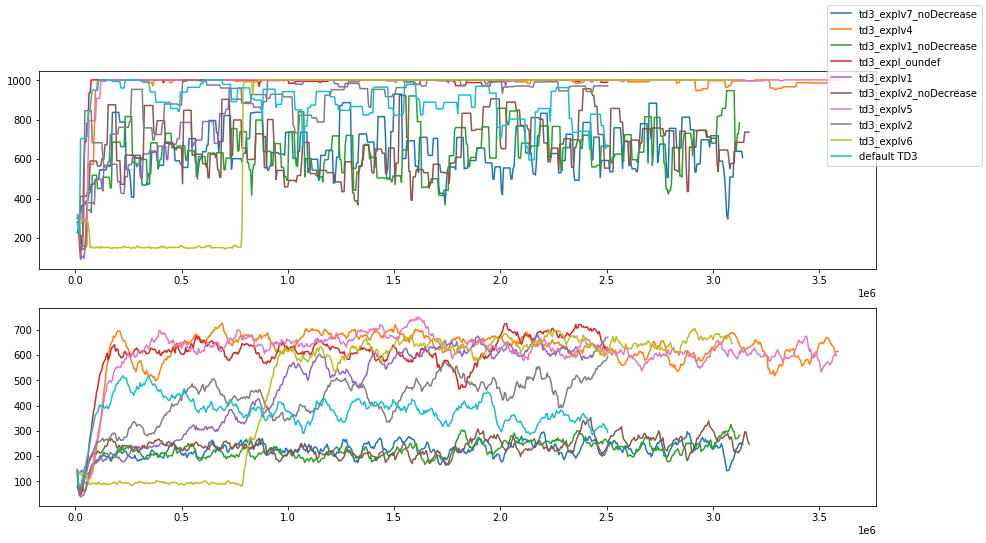

In [7]:
base_dir = "/s/ls4/users/grartem/RL_robots/RL_robotSim/results/FollowerContinuous/obst/TD3/explore/"
fig, axes  = plt.subplots(2,1)
for root, dirs, files in os.walk(base_dir):
    if "progress.csv" not in files:
        continue
    expName = root.split("/")[-2]
    if expName in []:
        continue
    try:
        df = pd.read_csv(root+"/progress.csv")
        axes[0].plot(df["timesteps_total"], df["episode_reward_max"], label=expName)
        axes[1].plot(df["timesteps_total"], df["episode_reward_mean"])
        #axes[2].plot(df["timesteps_total"], df["episode_reward_min"])
    except pd.errors.EmptyDataError as ede:
        print(root)
        print("Empty data. " + str(ede))
        print()
    except KeyError as ke:
        print(root)
        print("no key " + str(ke))
        print()
df = pd.read_csv("/s/ls4/users/grartem/RL_robots/RL_robotSim/results/FollowerContinuous/obst/allDefault/td3/TD3_continuous-grid_fac69_00000_0_2022-03-15_22-27-40/progress.csv")
axes[0].plot(df["timesteps_total"], df["episode_reward_max"], label="default TD3")
axes[1].plot(df["timesteps_total"], df["episode_reward_mean"])
fig.set_size_inches(15,8)
fig.legend()
plt.show()

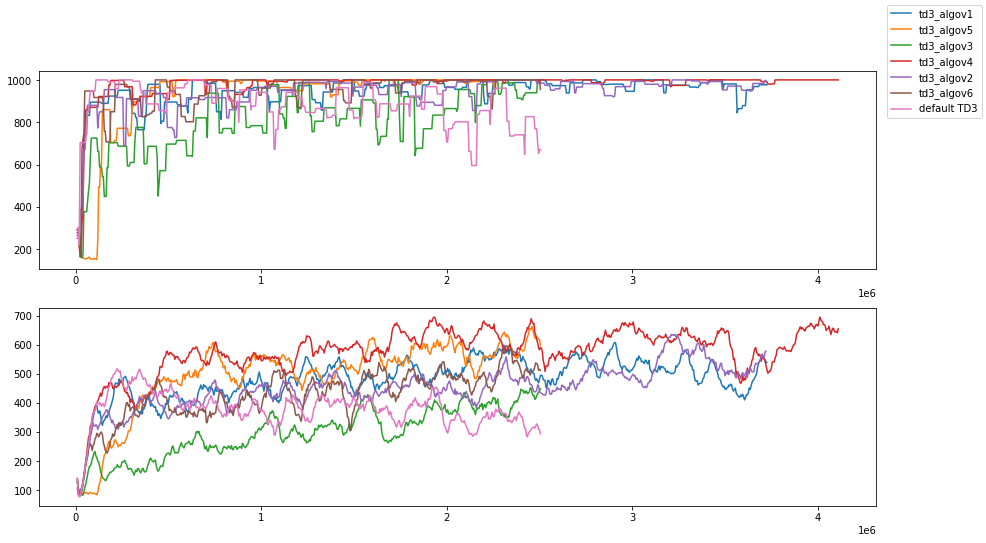

In [8]:
base_dir = "/s/ls4/users/grartem/RL_robots/RL_robotSim/results/FollowerContinuous/obst/TD3/algorythm/"
fig, axes  = plt.subplots(2,1)
for root, dirs, files in os.walk(base_dir):
    if "progress.csv" not in files:
        continue
    expName = root.split("/")[-2]
    if expName in []:
        continue
    try:
        df = pd.read_csv(root+"/progress.csv")
        axes[0].plot(df["timesteps_total"], df["episode_reward_max"], label=expName)
        axes[1].plot(df["timesteps_total"], df["episode_reward_mean"])
        #axes[2].plot(df["timesteps_total"], df["episode_reward_min"])
    except pd.errors.EmptyDataError as ede:
        print(root)
        print("Empty data. " + str(ede))
        print()
    except KeyError as ke:
        print(root)
        print("no key " + str(ke))
        print()
df = pd.read_csv("/s/ls4/users/grartem/RL_robots/RL_robotSim/results/FollowerContinuous/obst/allDefault/td3/TD3_continuous-grid_fac69_00000_0_2022-03-15_22-27-40/progress.csv")
axes[0].plot(df["timesteps_total"], df["episode_reward_max"], label="default TD3")
axes[1].plot(df["timesteps_total"], df["episode_reward_mean"])
fig.set_size_inches(15,8)
fig.legend()
plt.show()